# Лабораторная работа 2

Задача: Используя алгоритмы машинного обучения, создать модели, которые предсказывают какой пассажир выжил после крушения на Титанике.

Данные: Обучающая выборка должна быть использована для построения ваших моделей машинного обучения. Для обучающей выборки есть таргет survived.

Тестовая выборка таргета не имеет. Она должна использоваться для оценки качества работы ваших моделей на платформе kaggle.com

Подробнее о данных: https://www.kaggle.com/competitions/titanic/data

### 1. Загрузить данные для обучения и теста, найти признаки с пропущенными значениями.

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 2. Проанализировать все признаки. Для каждого признака определить:

Получить основные статистики (describe)

In [259]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Количество пропусков

In [260]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [261]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Тип признака (категориальные, текстовые, числовые)

In [262]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Категориальные: Survived, Pclass, Sex, Embarked.
Текстовые: Name
Числовые: Age, Fare, SibSp, Parch.

Числовые: Age, Fare, SibSp, Parch

Для категориальных данных определить уникальные значения

In [263]:
train_cat = train[['Survived','Pclass', 'Sex', 'Embarked']]
for col in train_cat.columns:
    print(train_cat[col].value_counts()) # to print count of every category

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Для категориальных данных построить bar plot (plt.bar()), определить признаковое распредение значений

<AxesSubplot:xlabel='Sex'>

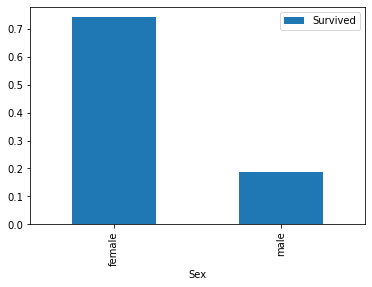

In [264]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

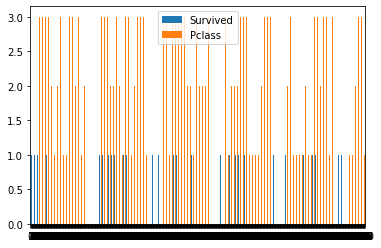

In [265]:
ax = train_cat.plot.bar(rot=0)

Для числовых признаков построить гистограмму (plt.hist()), попробовать разное количество бинов (bins) в разбиении. Определить тип распределения(равномерный, нормальный ...)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

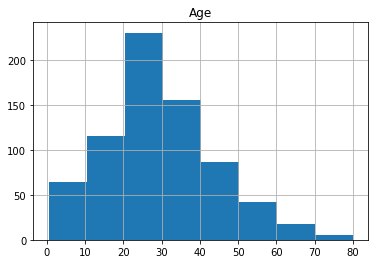

In [266]:
train.hist(column='Age', bins = 8)

нормальное распределение

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

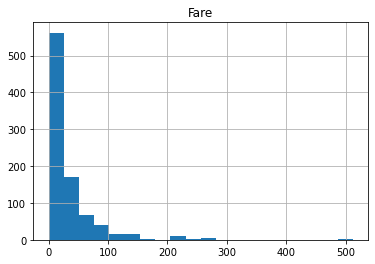

In [267]:
train.hist(column='Fare', bins = 20)

array([[<AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

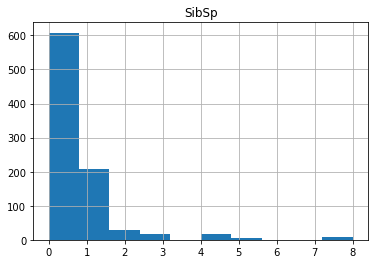

In [268]:
train.hist(column='SibSp', bins = 10)

array([[<AxesSubplot:title={'center':'Parch'}>]], dtype=object)

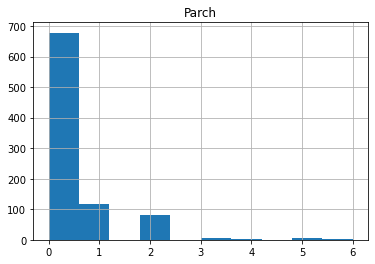

In [269]:
train.hist(column='Parch', bins = 10)

экспоненциальное распределение

### 3. Препроцессинг данных. Для каждого признака необходимо:

In [270]:
train1 = pd.read_csv('train.csv')

test1 = pd.read_csv('test.csv')

Заменить пропуски

Пропуски в train: Age, Cabin, Embarked. Cabin имеет много пропусков и не связан с выживаемостью, так что с ним не работаем.
В test: Age, Fare, Cabin. Здесь также пропускаем Cabin. 

In [271]:
from sklearn.ensemble import RandomForestClassifier

Для Age и Fare применим замену медианой.

In [272]:
train['Age'].fillna(train['Age'].mean(), inplace = True)
test['Age'].fillna(test['Age'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

Для Embarked - самым частым

In [273]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

Для категориальных текстовых признаков получить категориальные числовые (признак Sex). Попробовать из sklearn LabelEncoder и OneHotEncoder (на выбор)

In [274]:
from sklearn.preprocessing import LabelEncoder

In [275]:
train['Sex'] = pd.Series(LabelEncoder().fit_transform(train['Sex'].astype('str')))
test['Sex'] = pd.Series(LabelEncoder().fit_transform(test['Sex'].astype('str')))

In [276]:
train['Embarked'] = pd.Series(LabelEncoder().fit_transform(train['Embarked'].astype('str')))
test['Embarked'] = pd.Series(LabelEncoder().fit_transform(test['Embarked'].astype('str')))

Нормализация (sklearn):

In [277]:
from sklearn.preprocessing import StandardScaler

In [278]:
#train = train.drop(columns = ['PassengerId', 'Name','Ticket', 'Cabin'])
train = train.drop(columns = ['Name','Ticket', 'Cabin'])
test = test.drop(columns = ['Name','Ticket', 'Cabin'])

In [279]:
num_cols = train[['Age', 'Fare']].columns

In [280]:
train[num_cols].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [281]:
ss = StandardScaler()
train[num_cols] = ss.fit_transform(train[num_cols])
train[num_cols].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.562796e-16,-4.373606e-17
std,1.000562e+00,1.000562e+00
min,-2.253155e+00,-6.484217e-01
25%,-5.924806e-01,-4.891482e-01
50%,0.000000e+00,-3.573909e-01
75%,4.079260e-01,-2.424635e-02
max,3.870872e+00,9.667167e+00


In [282]:
ss = StandardScaler()
test[num_cols] = ss.fit_transform(test[num_cols])
test[num_cols].describe()

,Age,Fare
count,4.180000e+02,4.180000e+02
mean,8.698518e-17,8.154030e-17
std,1.001198e+00,1.001198e+00
min,-2.319355e+00,-6.377637e-01
25%,-5.200968e-01,-4.962194e-01
50%,-2.048523e-01,-3.786501e-01
75%,4.847449e-01,-7.358230e-02
max,3.656893e+00,8.546519e+00


4. Разбить данные для обучения на тренировочную и валидационную выборки. Для оценки качества модели необходимо проверить полученную модель на валидационных данных (train_test_split(X, y, random_state=42, stratify=y, test_size=20))

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
train2, val = train_test_split(train, test_size=20)

5.

Обучить на предобработанных данных следующие модели:

Логистическая регрессия (LogisticRegression)

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [323]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=101)

In [324]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,1,1.215947,0,0,-0.074583,2
700,701,1,0,-0.900298,1,0,3.932723,0
748,749,1,1,-0.823344,1,0,0.420730,2
751,752,3,1,-1.823750,0,1,-0.397241,2
481,482,2,1,0.000000,0,0,-0.648422,2


In [326]:
print(confusion_matrix(Y_test,predictions))

[[45  6]
 [12 27]]


In [327]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



Машины опорных векторов (SVC)

In [318]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

62.17

In [320]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        51
           1       0.00      0.00      0.00        39

    accuracy                           0.57        90
   macro avg       0.28      0.50      0.36        90
weighted avg       0.32      0.57      0.41        90



C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [322]:
print(confusion_matrix(Y_test,Y_pred))

[[51  0]
 [39  0]]


Метод ближайших соседей (KNeighborsClassifier)

In [354]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

78.4

In [355]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.51      0.69      0.58        51
           1       0.24      0.13      0.17        39

    accuracy                           0.44        90
   macro avg       0.37      0.41      0.38        90
weighted avg       0.39      0.44      0.40        90



In [356]:
print(confusion_matrix(Y_test,Y_pred))

[[35 16]
 [34  5]]


Наивый байес (GaussianNB)

In [333]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.15

In [334]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        51
           1       0.82      0.72      0.77        39

    accuracy                           0.81        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.81      0.81      0.81        90



In [335]:
print(confusion_matrix(Y_test,Y_pred))

[[45  6]
 [11 28]]


Дерево решений (DecisionTreeClassifier)

In [336]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [338]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        51
           1       0.80      0.62      0.70        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90



In [339]:
print(confusion_matrix(Y_test,Y_pred))

[[45  6]
 [15 24]]


Случайный лес (RandomForestClassifier)

In [376]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [360]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        51
           1       0.86      0.62      0.72        39

    accuracy                           0.79        90
   macro avg       0.81      0.77      0.77        90
weighted avg       0.80      0.79      0.78        90



In [361]:
print(confusion_matrix(Y_test,Y_pred))

[[47  4]
 [15 24]]


Градиентный бустинг (GradientBoostingClassifier)

In [ ]:
my_model1 = XGBClassifier(random_state = 11)
my_model1.fit(X_train, y_train)

preds = my_model1.predict(X_test)
acc = (accuracy_score(y_test, preds))* 100
print(f'Accuracy Score: {acc:.2f}%')

In [364]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
Y_pred = gbrt.predict(X_test)
gbrt.score(X_train, Y_train)
acc_grbt = round(gbrt.score(X_train, Y_train) * 100, 2)
acc_grbt

91.76

In [365]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        51
           1       0.93      0.64      0.76        39

    accuracy                           0.82        90
   macro avg       0.85      0.80      0.81        90
weighted avg       0.84      0.82      0.82        90



In [366]:
print(confusion_matrix(Y_test,Y_pred))

[[49  2]
 [14 25]]


## 6. Получить лучший результ на kaggle.com

In [ ]:
# https://www.kaggle.com/code/fatmakursun/titanic-classification-models

In [378]:
test_prediction = random_forest.predict(test)
test_prediction = [ 1 if y>=0.5 else 0 for y in test_prediction]

In [379]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [380]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [381]:
df= new_test[['PassengerId' ,'Survived']]

In [382]:
df.to_csv('predictions.csv' , index=False)